<a href="https://colab.research.google.com/github/marcosbarker/serratec.residencia/blob/marcosbarker/palestra_ai_ml_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configuração do Ambiente


Executar e depois reiniciar o ambiente.

In [1]:

!pip install delayed
!pip install graphviz
!pip install pydotplus
!apt-get install graphviz -y
!pip install cmake 'gym[atari]' scipy

!apt-get install build-essential swig gcc-5 g++-5
!pip install cython
#!pip install "dask[dataframe]"
!pip install dask distributed --upgrade
!pip install auto-sklearn

     |████████████████████████████████| 92kB 3.9MB/s 
     |████████████████████████████████| 81kB 5.1MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
  swig3.0
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-d

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
from sklearn import preprocessing

import seaborn as sns
sns.set(style="ticks")
plt.style.use('ggplot')
rcParams["figure.figsize"]=10,5
%matplotlib inline
np.random.seed(42)

# Predizer o preço de uma casa








In [4]:
data = pd.DataFrame([
     [3, 'zona norte', 300., 600.],
     [2, 'zona sul',   250., 900.],
     [3, 'baixada',  350., 450.],
     [4, 'zona norte', 550., 700.],
     [2, 'baixada', 200., 300.]
], columns=['quartos','localizacao','area','preco'])
data

quartos localizacao   area  preco
0        3  zona norte  300.0  600.0
1        2    zona sul  250.0  900.0
2        3     baixada  350.0  450.0
3        4  zona norte  550.0  700.0
4        2     baixada  200.0  300.0

## One-shot-encoding

Permite converter valores catégoricos em valores numéricos.

In [5]:
data = data.join(pd.get_dummies(data['localizacao']))
data = data.drop('localizacao', axis=1)
data

quartos   area  preco  baixada  zona norte  zona sul
0        3  300.0  600.0        0           1         0
1        2  250.0  900.0        0           0         1
2        3  350.0  450.0        1           0         0
3        4  550.0  700.0        0           1         0
4        2  200.0  300.0        1           0         0

In [6]:
X = data[['quartos', 'area','zona sul','zona norte','baixada']].values
Y = data[['preco']].values
print ('X = ', X)
print ('Y = ', Y)

X =  [[  3. 300.   0.   1.   0.]
 [  2. 250.   1.   0.   0.]
 [  3. 350.   0.   0.   1.]
 [  4. 550.   0.   1.   0.]
 [  2. 200.   0.   0.   1.]]
Y =  [[600.]
 [900.]
 [450.]
 [700.]
 [300.]]


## Normalização


## $z_{i} = \frac{ x_{i} - min(x)}{max(x)-min(x)} $



Exemplo:

valores área: 300, 250, 350, 550, 200


* min(x) = 200
* max(x) = 550
* max(x) - min(x) = 350


| x     |  x - min(x)| resultado |
|-------|---------------:|------------------:|
|300 |          100|     0.285 | 
|250|50| 0.142 | 
|350|150| 0.428| 
|550|350| 1|
|200|0| 0| 


valores quartos: 3, 2, 3, 4, 2


* min(x) = 2
* max(x) = 4
* max(x) - min(x) = 2


| x     |  x - min(x)| resultado |
|-------|---------------:|------------------:|
|3 |          1|     0.5 | 
|2| 0| 0 | 
|3|1| 0.5| 
|4|2| 1|
|2|0| 0| 



In [7]:
minMaxX = preprocessing.MinMaxScaler()
X = minMaxX.fit_transform(X)
minMaxY = preprocessing.MinMaxScaler()
Y = minMaxY.fit_transform(Y)
print ('X = ', X)
print ('Y = ', Y)

X =  [[0.5        0.28571429 0.         1.         0.        ]
 [0.         0.14285714 1.         0.         0.        ]
 [0.5        0.42857143 0.         0.         1.        ]
 [1.         1.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]
Y =  [[0.5       ]
 [1.        ]
 [0.25      ]
 [0.66666667]
 [0.        ]]


## Função para predição


# ${y}' = x . w + b$

Onde:
* ${y}'$ = valor estimado calculado
* $x$ = valores do exemplo
* $b$ = *bias* (viés) 

### Exemplo: 

 x = [0.5,    0.285,  0, 1,  0]

 w = [0.3,    0.23,  0.2, 0.41, -0.3]

b = 0.3

${y}' = \begin{bmatrix} 0.5 &   0.285 &  0 & 1 &  0\end{bmatrix} 
. 
\begin{bmatrix} 0.3  \\  0.23 \\ 0.2 \\ 0.41 \\ -0.3\end{bmatrix} 
+ 0.3
$

${y}' = 0.5 \times 0.3 +  0.285 \times 0.23 + 0 \times 0.2 + 1 \times 0.41 + 0 \times -0.3  + 0.3 $

${y}' = 0,925$

In [ ]:
def predizer(x):
  return np.dot(w , x) + b


## Função de Custo

### Erro quadrático médio ( Mean Squared Error )

##$MSE = \frac{1}{N} \sum_{i=1}^{N}(y_{i}-{y}_{i}')^{2}$


Onde:
* $N$ - Total de exemplos
* $y$ - valor esperado
* ${y}'$ - valor estimado

Exemplo: 
* iteração 1:

| esperado | estimado | diferença$^2$|total|
|-----------------|----------------|-------------------------|---|
|8|5| $(8-5)^2$|9|
|3|4| $(3-4)^2$|1|
|5|7|$(5-7)^2$|4|
|||MSE|4.66

* iteração 2:

| esperado | estimado | diferença$^2$|total|
|-----------------|----------------|-------------------------|---|
|8|6| $(8-6)^2$|4|
|3|3| $(3-3)^2$|0|
|5|6|$(5-6)^2$|1|
|||MSE|1.66



In [8]:
def calcCusto(erros):
  somaErro = 0.0
  for e in erros:
    somaErro += (e ** 2)

  return somaErro/len(erros)  

## Treinamento

In [9]:
# inicialização dos valores dos pesos e viés
w = np.zeros(X.shape[1])
b = 0.0

#número de iterações
epocas = 70
#taxa a ser aplicada durante a atualização dos pesos e viés
taxa = 0.01

#lista para armazenar os custos por iteração
custo=[]

for _ in range(epocas):
  #lista para armazenar os erros de cada exemplo
  erros = []
  for xi, yi in zip(X,Y):
    #realiza a predicao
    ylinha = predizer(xi)
    #calcula o erro
    erro = yi -  ylinha
    #realiza a atualizacao dos pesos
    w = w + (erro * xi) * taxa
    b = b + (erro) * taxa
    #armazena o erro
    erros.append(erro)
  
  #calcula o custo dos erros desta iteracao
  c = calcCusto(erros)
  #armazena o custo
  custo.append(c)

#plota o grafico dos custos por iteracao
plt.scatter(range(0,len(custo)), custo, c='r')
plt.xlabel('epocas')
plt.ylabel('custo')
plt.show()

NameError: ignored

## Inferência

In [ ]:
novaCasa = [3.,200.,0.,1.,0. ]
print('Nova Casa = ', novaCasa)

novaCasaMinMax = minMaxX.transform([novaCasa])
print('\nNova Casa "normalizada" = ', novaCasaMinMax)
precoCalc = predizer(novaCasaMinMax[0])
print('\nPreço normalizado = ',  precoCalc)
preco = minMaxY.inverse_transform([precoCalc])
print('\nPreco Final = ', preco)

Nova Casa =  [3.0, 200.0, 0.0, 1.0, 0.0]

Nova Casa "normalizada" =  [[0.5 0.  0.  1.  0. ]]

Preço normalizado =  [0.49248395]

Preco Final =  [[595.49036846]]


# Algorítimos Supervisionados

## Árvores de Decisão

* Permite analisar de como o modelo “aprendeu” o padrão dos dados



In [ ]:
from sklearn import tree

dados = pd.DataFrame(
[[170,	9,	1],
[175,	10,	1],
[180,	8,	1],
[178,	8,	1],
[182,	7,	1],
[130,	3,	0],
[120,	4,	0],
[130,	2,	1],
[138,	5,	0],
[145,	6,	0]], columns= ['peso', 'macio', 'fruta'])

dados

peso  macio  fruta
0   170      9      1
1   175     10      1
2   180      8      1
3   178      8      1
4   182      7      1
5   130      3      0
6   120      4      0
7   130      2      1
8   138      5      0
9   145      6      0

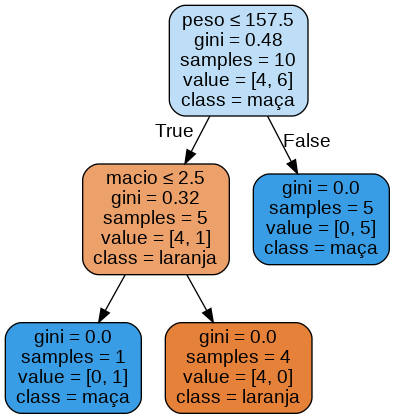

In [ ]:
#Separacao dos dados em exemplos (X) e classes (Y)
X = dados[['peso', 'macio']].values
Y = dados[['fruta']].values

#instanciacao do classificador
clf = tree.DecisionTreeClassifier()

#treinamento / aprendizado
clf.fit(X,Y)

#apenas usado para "visualizar a arvore"
import graphviz 
#from sklearn.externals.six import StringIO 
from six import StringIO
import pydotplus
dot_data = StringIO()


tree. export_graphviz(clf, out_file=dot_data, feature_names=['peso','macio'] ,
                filled=True, rounded=True, class_names=['laranja','maça'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
from IPython.display import Image 
Image(graph.create_png())

### Sobreviventes Titanic

In [ ]:
#carregamento dos dados
import statsmodels.api as sm
titanic = sm.datasets.get_rdataset(	"TitanicSurvival", "carData").data		
titanic
titanic.describe()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


age
count  1046.000000
mean     29.881135
std      14.413500
min       0.166700
25%      21.000000
50%      28.000000
75%      39.000000
max      80.000000

In [ ]:
titanic

survived     sex      age passengerClass
Allen, Miss. Elisabeth Walton        yes  female  29.0000            1st
Allison, Master. Hudson Trevor       yes    male   0.9167            1st
Allison, Miss. Helen Loraine          no  female   2.0000            1st
Allison, Mr. Hudson Joshua Crei       no    male  30.0000            1st
Allison, Mrs. Hudson J C (Bessi       no  female  25.0000            1st
...                                  ...     ...      ...            ...
Zabour, Miss. Hileni                  no  female  14.5000            3rd
Zabour, Miss. Thamine                 no  female      NaN            3rd
Zakarian, Mr. Mapriededer             no    male  26.5000            3rd
Zakarian, Mr. Ortin                   no    male  27.0000            3rd
Zimmerman, Mr. Leo                    no    male  29.0000            3rd

[1309 rows x 4 columns]

In [ ]:
#alterar os dados categoricos para valores numericos
titanic['sex'] = np.where(titanic['sex'] == 'male', 1 ,0)
titanic['survived'] = np.where(titanic['survived'] == 'yes', 1 ,0)
titanic['passengerClass'] = np.where(titanic['passengerClass'] == '1st', 1 ,
                                     np.where(titanic['passengerClass'] == '2nd', 2,3))

#remover linhas com valores faltantes
titanic = titanic.dropna(axis=0, how='any')
#exibe inicio dos dados
titanic.head()


survived  sex      age  passengerClass
Allen, Miss. Elisabeth Walton           1    0  29.0000               1
Allison, Master. Hudson Trevor          1    1   0.9167               1
Allison, Miss. Helen Loraine            0    0   2.0000               1
Allison, Mr. Hudson Joshua Crei         0    1  30.0000               1
Allison, Mrs. Hudson J C (Bessi         0    0  25.0000               1

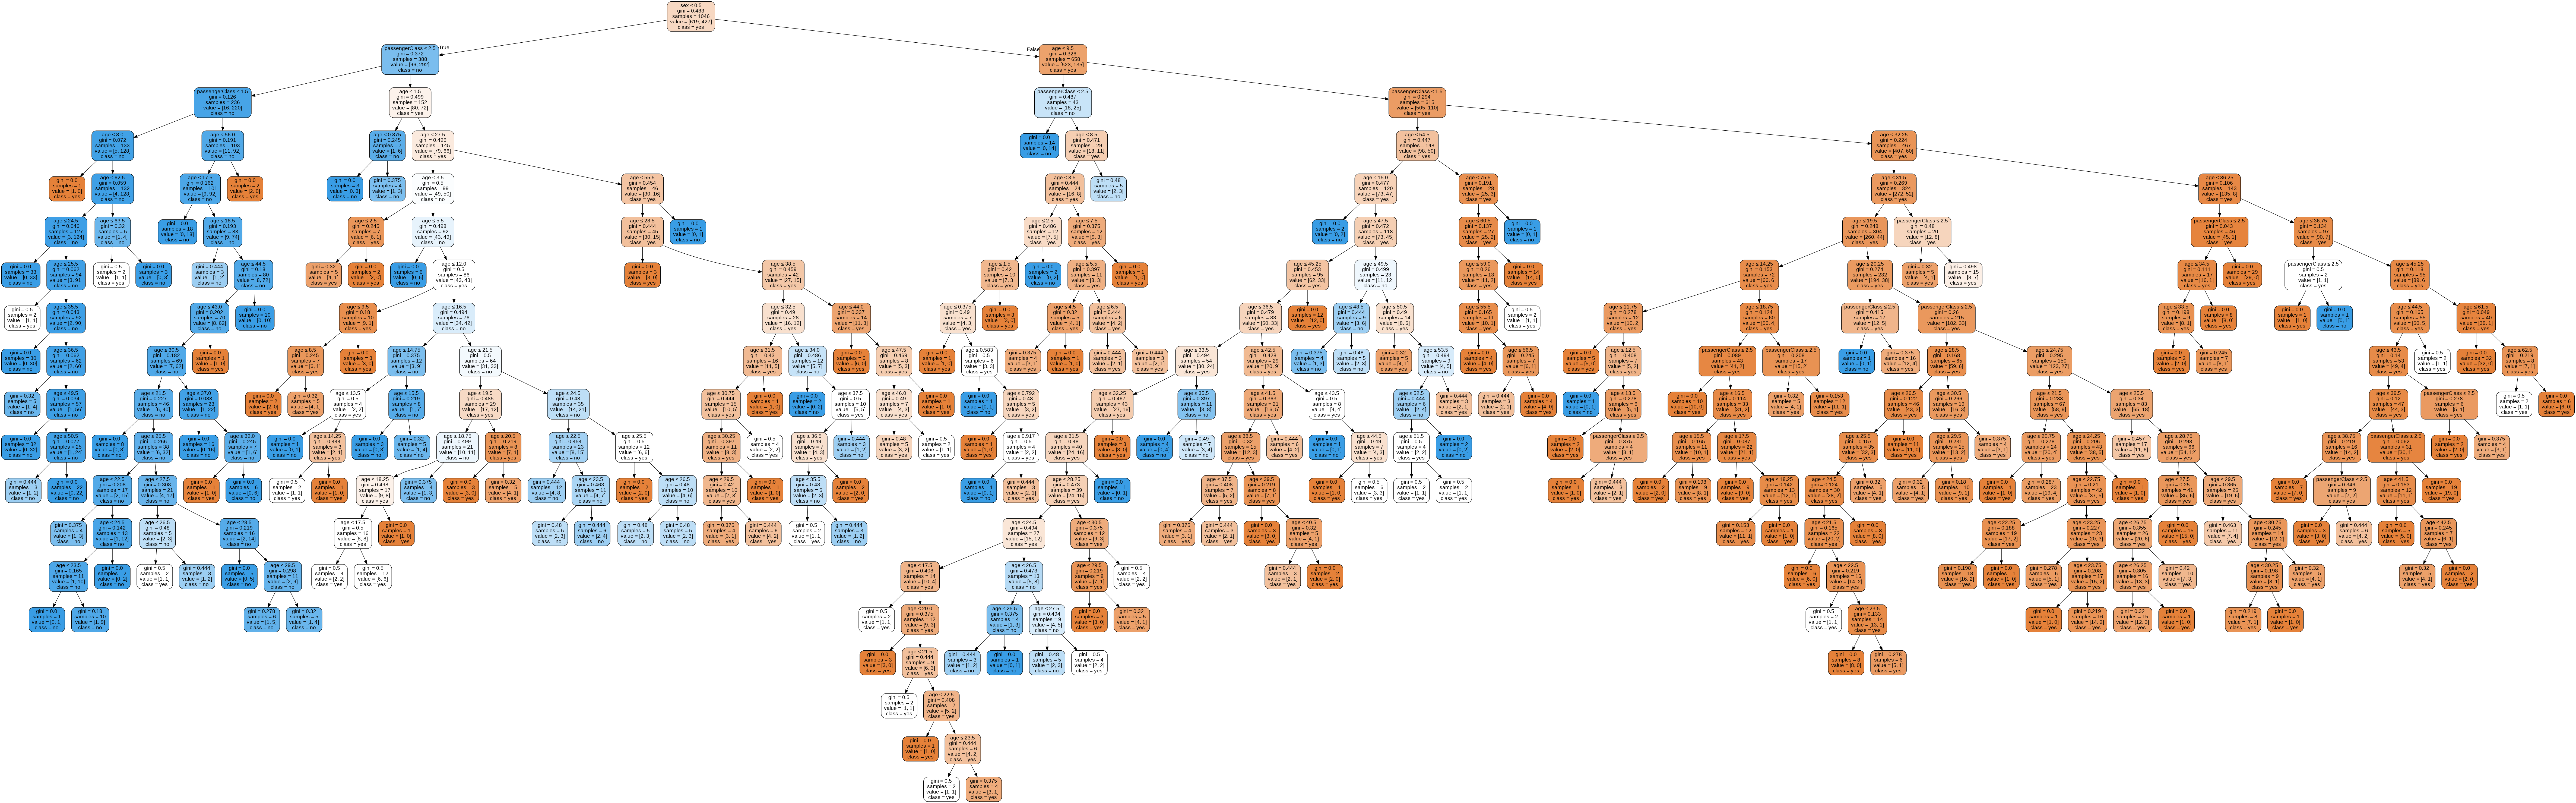

In [ ]:
from sklearn import tree

#Separacao dos dados em exemplos (X) e classes (Y)
X = titanic[['passengerClass','sex','age']].values
Y = titanic['survived'].values

#instancia o classificador
clf = tree.DecisionTreeClassifier()

#realiza o treinamento
clf.fit(X, Y)

#trecho usado apenas para visualizar a arvore
import graphviz 
from six import StringIO
import pydotplus
dot_data = StringIO()


tree. export_graphviz(clf, out_file=dot_data, feature_names= ['passengerClass','sex','age'],
                filled=True, rounded=True, class_names=[ 'yes', 'no'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
from IPython.display import Image 
Image(graph.create_png())


## Naive Bayes

* Classificador probabilístico baseado no “Teorema de Bayes”
 * O pastor Thomas Bayes (1701 - 1761) publicou um ensaio buscando resolver um problema na doutrina das
probabilidades, no qual havia a formulação do Teorema de Bayes. Era creditado que esse
artigo fornecia uma prova da existência de Deus.

* Usos mais comuns: classificação de e-mails SPAM


### Teorema de Bayes

Probabilidade de que A ocorra, dado que B ocorreu:

$P(A \mid B) = \frac{P(B \mid A) P(A)}
                                 {P(B)}$
                                 


Probabilidade de que y ocorra, dado que o vetor x ocorreu:

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$


Gaussian Naive Bayes

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

### Iris Dataset

Classificação de Flores de íris através das medidas da pétala e sépala (comprimento e altura)

|setosa|versicolor|virginica|
|--------|------------|----------|
|![setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg) | ![versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg) | ![versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg) |

![img](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTN7x10hF2t08-B4Bo82y5SUiBPGqr3d_FqQ&usqp=CAU)

In [ ]:
#carrega os dados
from sklearn.datasets import load_iris
iris=load_iris()

# exibe os 5 primeiros exemplos de cada classe
print ('exemplos', iris.data[:5], iris.data[50:55], iris.data[100:105])
print ('classes', iris.target[:5], iris.target[50:55], iris.target[100:105])


exemplos [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]] [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]
classes [0 0 0 0 0] [1 1 1 1 1] [2 2 2 2 2]


### Treino e Teste

Dividir os exemplos em dois blocos, um de treino e outro de teste (geralmente 30% para testes)



In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split


X=iris.data
y=iris.target

#separa os dados para treino e teste (30%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#instancia o classificador
gaussian = GaussianNB()

#realiza o aprendizado
gaussian.fit(X_train, y_train)

#faz a predicao dos dados de testes
y_pred = gaussian.predict(X_test)

#compara o valor predito para os dados de teste com o valor real
print("precisão", metrics.accuracy_score(y_test,y_pred))


precisão 0.9777777777777777


## Comparando Algorítimos de Classificação

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


# lista de classificadores
classificadores = {
    'GaussianNB':               GaussianNB(),
    'DecisionTreeClassifier':   DecisionTreeClassifier(),
    'LogisticRegression':       LogisticRegression(),
    'Support Vector Machine 1': SVC(kernel="linear", C=0.025),
    'Support Vector Machine 2': SVC(gamma=2, C=1),    
    'KNeighborsClassifier 1':   KNeighborsClassifier(),
    'KNeighborsClassifier 2':   KNeighborsClassifier(n_neighbors=3),
    'RandomForestClassifier 1': RandomForestClassifier(),
    'RandomForestClassifier 2': RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0),
    'MLPClassifier 1':          MLPClassifier(alpha=1),
    'MLPClassifier 2':          MLPClassifier(activation='logistic',learning_rate_init=0.01 )    
}

# exemplos e classes
X = titanic[['passengerClass','sex','age']].values
y = titanic['survived'].values

# dividir os exmemplos em treino e teste
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

for k in classificadores:
  clf = classificadores[k]
  #treinamento
  clf.fit(X_train, y_train)
  #inferencia
  y_pred = clf.predict(X_test)
  print(k, '\t', metrics.accuracy_score(y_test,y_pred))
  print(metrics.confusion_matrix(y_test,y_pred))
  



GaussianNB 	 0.7643312101910829
[[147  30]
 [ 44  93]]
DecisionTreeClassifier 	 0.7292993630573248
[[149  28]
 [ 57  80]]
LogisticRegression 	 0.7484076433121019
[[146  31]
 [ 48  89]]
Support Vector Machine 1 	 0.7611464968152867
[[147  30]
 [ 45  92]]
Support Vector Machine 2 	 0.7070063694267515
[[149  28]
 [ 64  73]]
KNeighborsClassifier 1 	 0.7388535031847133
[[151  26]
 [ 56  81]]
KNeighborsClassifier 2 	 0.732484076433121
[[149  28]
 [ 56  81]]
RandomForestClassifier 1 	 0.7133757961783439
[[140  37]
 [ 53  84]]
RandomForestClassifier 2 	 0.7515923566878981
[[165  12]
 [ 66  71]]
MLPClassifier 1 	 0.7515923566878981
[[147  30]
 [ 48  89]]
MLPClassifier 2 	 0.7707006369426752
[[164  13]
 [ 59  78]]



# Algorítimos Não Supervisionados

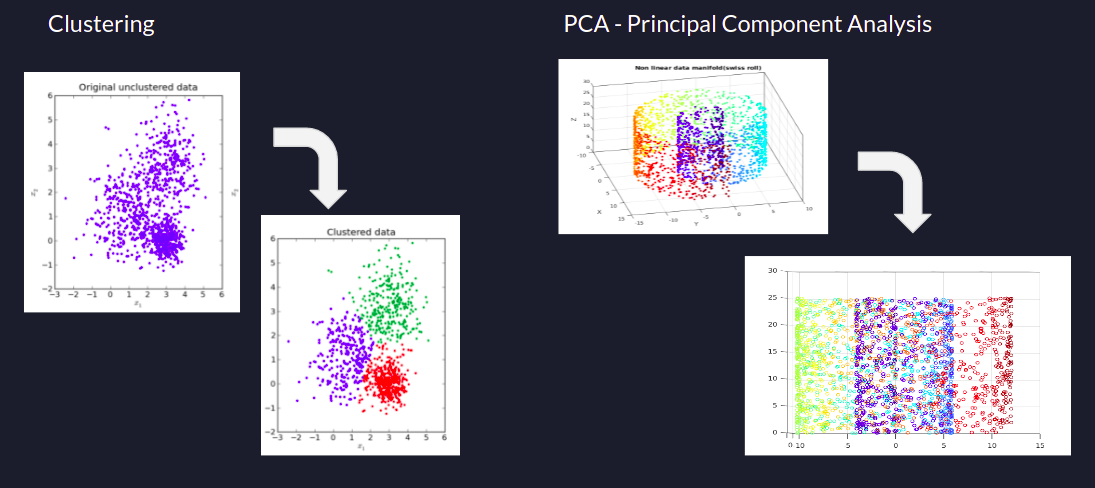


## Cluster

In [ ]:
#preparacao dos dados
dados = pd.DataFrame(columns=['idade', 'compras'], data=[
    [16, 3],
    [17, 5],
    [21, 10],
    [20, 8],
    [36, 6],
    [41, 7],
    [34, 7],
    [47, 6],
    [18, 9],
    [24, 4],
    [33, 8],
    

])
dados

idade  compras
0      16        3
1      17        5
2      21       10
3      20        8
4      36        6
5      41        7
6      34        7
7      47        6
8      18        9
9      24        4
10     33        8

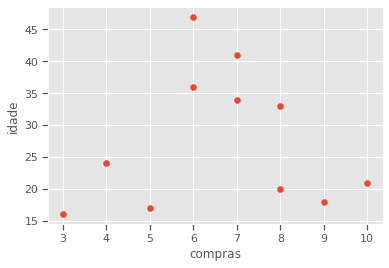

In [ ]:
#plota os dados num grafico
idades = dados['idade'].values
compras = dados['compras'].values
plt.scatter(compras,idades)
plt.xlabel('compras')
plt.ylabel('idade')
plt.show()

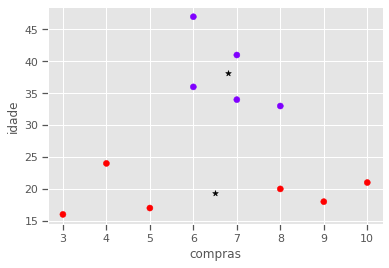

In [ ]:
from sklearn.cluster import KMeans
#define uma funcao para realizar o treinamento e plotar o resultado
def cluster(n):
  #instancia o algorítimo
  kmeans = KMeans(n_clusters=n)
  #treina o modelo
  kmeans.fit(dados.values)
  #recupera os centroides
  C = kmeans.cluster_centers_
  #plota os dados, com corres a partir dos labels dos centroides
  plt.scatter(compras,idades, c=kmeans.labels_, cmap='rainbow')
  #plota os centroides
  plt.scatter(C[:,1], C[:,0], marker='*', color='black', )
  plt.xlabel('compras')
  plt.ylabel('idade')

  #plt.axis([0,50, 0, 50])

  plt.show()
  
#para 2 clusteres  
cluster(2)  

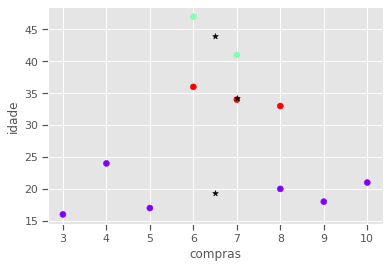

In [ ]:
# para 3 clusteres
cluster(3)

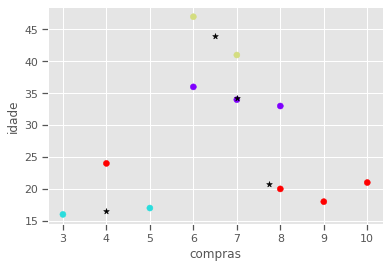

In [ ]:
#para 4 clusters
cluster(4)

# Aprendizado por Reforço

Q-Learning

$Q({\small state}, {\small action}) \leftarrow (1 - \alpha) Q({\small state}, {\small action}) + \alpha \Big({\small reward} + \gamma \max_{a} Q({\small next \ state}, {\small all \ actions})\Big)$



In [ ]:
import gym

env = gym.make("Taxi-v3").env

env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 3686
Penalties incurred: 1215


In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.05)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 3686
State: 0
Action: 5
Reward: 20


## AutoML e Emsemble

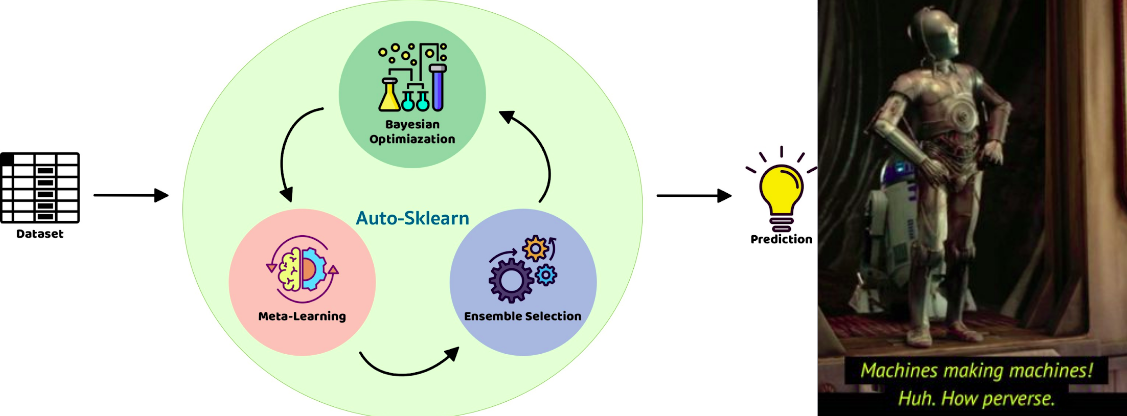


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import autosklearn.classification

# exemplos e classes
X = titanic[['passengerClass','sex','age']].values
y = titanic['survived'].values

# dividir os exmemplos em treino e teste
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


clf = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30)

#treinamento
clf.fit(X_train, y_train)
#inferencia
y_pred = clf.predict(X_test)
print('AUTOML 30 ', '\t', metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

print(clf.get_models_with_weights())

clf= autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60)
#treinamento
clf.fit(X_train, y_train)
#inferencia
y_pred = clf.predict(X_test)
print('AUTOML 60 ', '\t', metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

print(clf.get_models_with_weights())


/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


AUTOML 30  	 0.8121019108280255
[[152  27]
 [ 32 103]]
[(0.4, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'polynomial', 'classifier:extra_trees:bootstrap': 'False', 'classifier:extra_trees:criterion': 'entropy', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.993803313878608, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 2, 'classifier:extra_trees:min_samples_split': 20, 'classifier:extra_trees:min_weight_fraction_l

In [ ]:
clf.get_models_with_weights()

[(0.2,
  SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'passive_aggressive', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'kitchen_sinks', 'classifier:passive_aggressive:C': 0.14833233294431605, 'classifier:passive_aggressive:average': 'True', 'classifier:passive_aggressive:fit_intercept': 'True', 'classifier:passive_aggressive:loss': 'squared_hinge', 'classifier:passive_aggressive:tol': 0.00016482166646253793, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.20722745113476584, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max